In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Travelpac_Clean_data.xlsx', 'Sheet1')

In [3]:
#See stats about the continuous variables
data.describe()

,Year,visits,nights,Amount_Spent
count,404775.000000,404775.000000,4.047750e+05,4.047750e+05
mean,2014.175643,3073.866575,2.965127e+04,1.904861e+06
std,3.470207,6867.372082,6.978938e+04,4.974569e+06
min,2009.000000,0.087506,0.000000e+00,0.000000e+00
25%,2011.000000,746.828598,3.513249e+03,2.157256e+05
50%,2014.000000,1399.628708,1.018403e+04,6.410333e+05
75%,2017.000000,2992.012832,2.781308e+04,1.754846e+06
max,2021.000000,256190.202957,2.788350e+06,3.660149e+08


In [4]:
data.head()

,Year,quarter,where_contact_lives,mode,country,purpose,Holiday_Package,Age,Sex,Duration_of_Visit,visits,nights,Amount_Spent
0,2009,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,0-15,Male,4-13 nights,1600.680374,11204.762616,1.103402e+06
1,2009,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,0-15,Female,4-13 nights,1600.680374,11204.762616,1.125278e+06
2,2009,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,16-24,Male,4-13 nights,3064.743058,20873.377956,1.622982e+06
3,2009,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,16-24,Female,4-13 nights,2702.755561,12411.702616,1.164191e+06
4,2009,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,16-24,Female,14-27 nights,525.351507,7354.921102,7.633357e+05


In [5]:
data.shape

(404775, 13)

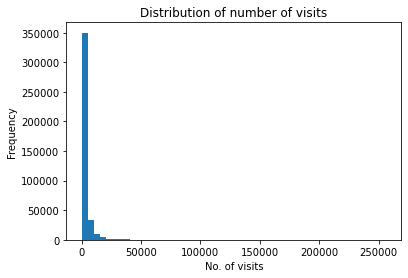

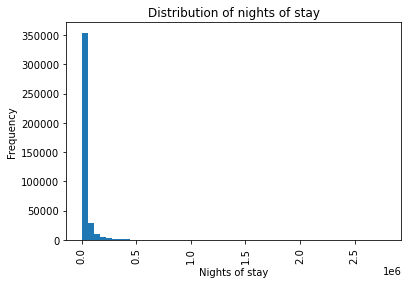

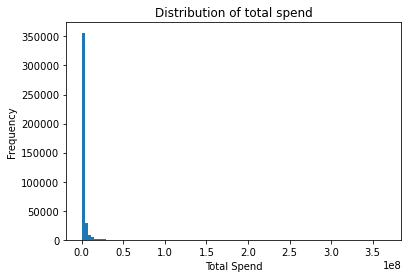

In [6]:
#Separate the continuous variables
visits_data = data['visits']
nights_data = data['nights']
amount_data = data['Amount_Spent']

#Plot histograms
plt.hist(visits_data,bins=50)
plt.title("Distribution of number of visits")
plt.xlabel("No. of visits")
plt.ylabel("Frequency")
plt.show()

plt.hist(nights_data,bins=50)
plt.title("Distribution of nights of stay")
plt.xlabel("Nights of stay")
plt.xticks(rotation='vertical')
plt.ylabel("Frequency")
plt.show()

plt.hist(amount_data,bins=100)
plt.title("Distribution of total spend")
plt.xlabel("Total Spend")
plt.ylabel("Frequency")
plt.show()

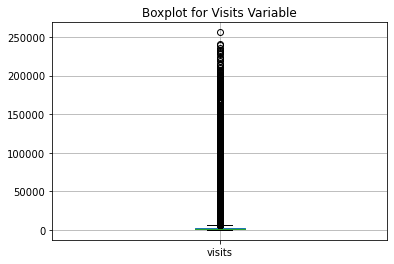

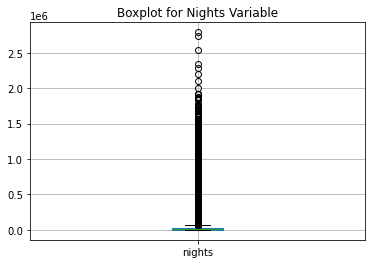

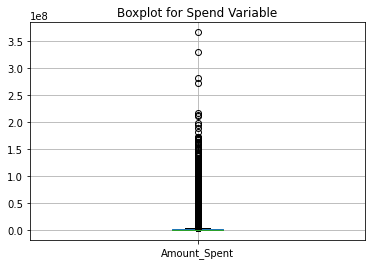

In [7]:
data.boxplot(column=['visits'], return_type='axes')
plt.title('Boxplot for Visits Variable')
plt.show()

data.boxplot(column=['nights'], return_type='axes')
plt.title('Boxplot for Nights Variable')
plt.show()

data.boxplot(column=['Amount_Spent'], return_type='axes')
plt.title('Boxplot for Spend Variable')
plt.show()

In [8]:
filter_outliers = data[['visits', 'nights', 'Amount_Spent']]

low = .05
high = .95
quant_outlier = filter_outliers.quantile([low, high])

print(quant_outlier)

            visits         nights  Amount_Spent
0.05    298.025801     365.397141  2.094406e+04
0.95  10439.222771  116582.790814  7.232096e+06


In [9]:
#remove all rows that are considered outlier (underneath 5th and 95th percentile) from all columns
filtered_outlier = filter_outliers.apply(lambda x: x[(x>quant_outlier.loc[low,x.name]) & 
                                    (x < quant_outlier.loc[high,x.name])], axis=0)

In [10]:
#Now we have removed all rows underneath the 5th and the 95th percentile
filtered_outlier.describe()

,visits,nights,Amount_Spent
count,364297.000000,364297.000000,3.642970e+05
mean,2147.651845,19060.455453,1.195707e+06
std,1997.390946,22553.416426,1.412964e+06
min,298.030430,365.419436,2.094444e+04
25%,797.185146,3981.155598,2.455535e+05
50%,1399.628708,10184.030619,6.410333e+05
75%,2726.492982,24829.716238,1.568400e+06
max,10439.190722,116582.785351,7.232046e+06


In [11]:
#Select the columns to join
cols_to_use = data.columns.difference(filtered_outlier.columns)
#Join the continuous variables with rest of data
filt_outliers = pd.concat([data[cols_to_use], filtered_outlier], axis=1, join='outer') 

In [12]:
#drop any rows with removed outliers
filt_outliers = filt_outliers.dropna(axis=0, how='any')

In [13]:
filt_outliers.head()

,Age,Duration_of_Visit,Holiday_Package,Sex,Year,country,mode,purpose,quarter,where_contact_lives,visits,nights,Amount_Spent
0,0-15,4-13 nights,Independent,Male,2009,Austria,Air,Holiday,Jan-Mar,UK residents,1600.680374,11204.762616,1.103402e+06
1,0-15,4-13 nights,Independent,Female,2009,Austria,Air,Holiday,Jan-Mar,UK residents,1600.680374,11204.762616,1.125278e+06
2,16-24,4-13 nights,Independent,Male,2009,Austria,Air,Holiday,Jan-Mar,UK residents,3064.743058,20873.377956,1.622982e+06
3,16-24,4-13 nights,Independent,Female,2009,Austria,Air,Holiday,Jan-Mar,UK residents,2702.755561,12411.702616,1.164191e+06
4,16-24,14-27 nights,Independent,Female,2009,Austria,Air,Holiday,Jan-Mar,UK residents,525.351507,7354.921102,7.633357e+05


In [14]:
filt_outliers.shape

(316678, 13)

In [15]:
#write data to file
filt_outliers.reset_index(drop=True, inplace = True)

#WRITE TO FILE
filt_outliers.to_excel(r'cleaned_Travelpac_removed_outliers.xlsx', index=False)